In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Preprocessing

# Modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics



In [5]:
X = df.drop('target',axis=1).values
Y = df['target'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
rf = RandomForestClassifier(random_state=50)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

100.0

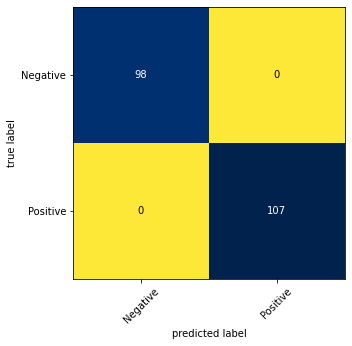

In [7]:
conf_mat=confusion_matrix(Y_test,Y_pred_rf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='cividis_r'); #fn
#plt.savefig("RFcrr.png")

In [8]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



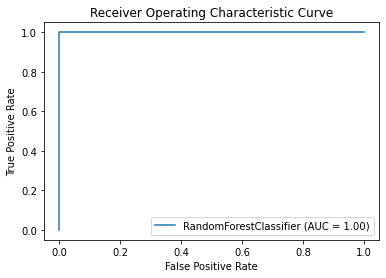

In [9]:
plot_roc_curve(rf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
#plt.savefig("RF.png")

In [12]:
Input = (63, 1, 3,145,233,1,0,150, 0, 2.3,0,0,1)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print("The Person will has a Heart Disease ")


[1]
The Person will has a Heart Disease 


In [13]:
   import pickle
with open('models.pkl', 'wb') as file:
    pickle.dump(rf, file)